<a href="https://colab.research.google.com/github/ErangaOttachchige/Classify-traffic-congestion-level-using-MLP-with-PyTorch/blob/main/Classify_traffic_congestion_level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IIT Id : 20221123 <br/>
UoW Id : w1954115 <br/>
Name : Ottachchige Isuru Eranga<br/>
<br/><br/>
<h1 style="text-align: center">Classify traffic congestion level using real-world traffic + time + weather features.</h1>
<br/>

# Part A - Application Area Review

#### 1. Introduction and goal
Traffic congestion is a persistent challenge for cities because it reduces travel-time reliability, increases operating costs for logistics, and contributes to unnecessary fuel use and emissions. Modern Intelligent Transportation Systems (ITS) address these issues by combining sensing (e.g., loop detectors, cameras, probe data), communications, and decision-support tools to support control actions such as adaptive signal timing, ramp metering, and traveler information. A core capability in ITS is traffic state estimation and prediction, where models forecast traffic conditions or classify congestion levels so that operators can respond proactively rather than react after congestion forms. (Liu et al., 2025)

For this coursework domain, the practical goal is typically to use historical traffic and contextual variables (time-of-day, day-of-week, weather, holidays) to predict near-future traffic conditions, enabling better traffic control decisions and operational planning. (Liu et al., 2025)
<br></br>

#### 2. How AI is applied in traffic control

AI methods in traffic control are commonly applied in two closely related tasks:

* **Traffic flow/volume forecasting (regression)**: predicting a numerical value such as traffic volume, speed, or travel time for a future time horizon. This supports functions like corridor management and ramp metering by indicating when and where demand will exceed capacity. (Liu et al., 2025)

* **Traffic state classification (classification):** predicting discrete congestion states such as low/moderate/high or free-flow/congested. These outputs are often easier to interpret and can map directly to operational rules (e.g., “if high congestion predicted, adjust signal plan”). (Liu et al., 2025)

In practice, AI predictions are typically used as decision support rather than fully automated control. For example, a model that predicts high congestion during a peak hour under adverse weather can help prioritize targeted interventions and inform traveler warnings. (Liu et al., 2025)
<br></br>

#### 3. AI techniques used in the domain
##### 3.1 Machine learning on engineered features

Traditional machine learning methods remain popular because traffic data can often be represented as tabular features (hour, weekday, month/season, weather variables, holiday indicator, and lagged traffic values). Reviews of ITS traffic prediction commonly categorize approaches into statistics-based, machine learning-based and deep learning-based methods, highlighting the practical value of machine learning when features are well engineered and deployment needs are straightforward. (Liu et al., 2025)

Examples include logistic regression (interpretable baseline), support vector machines (SVM) (effective with scaled features and tuning), and tree ensembles such as Random Forests. The main strengths are relatively low setup time, fast training, and good performance on structured datasets. Limitations include dependence on feature engineering and weaker handling of complex temporal dynamics unless time-lag features are explicitly added. (Liu et al., 2025)

##### 3.2 Deep learning for temporal dependencies
Traffic patterns are strongly temporal (daily and weekly cycles, peak hours, disruption effects). Deep learning models (e.g., RNN/LSTM-type architectures) are widely used to learn time dependencies more directly from sequential data, often improving short-term forecasting when sufficient data is available. However, these models require more tuning and careful evaluation to avoid overfitting and to maintain robustness across changing traffic conditions. (Liu et al., 2025)

##### 3.3 Spatio-temporal (graph) deep learning for road networks
When the objective is network-wide prediction using many sensors and road segments, traffic becomes spatio-temporal: conditions at one link influence nearby links and propagate through the network. This motivates graph-based modelling, where road segments/sensors are nodes and connectivity forms edges.

A well-known example is DCRNN (Diffusion Convolutional Recurrent Neural Network), which models traffic flow as a diffusion process on a directed graph and combines spatial graph operations with recurrent temporal modelling. The authors report consistent improvements over strong baselines on large-scale road network datasets. (Li et al., 2017)

Another influential approach is STGCN (Spatio-Temporal Graph Convolutional Networks), which integrates graph convolution with temporal convolution to capture both spatial and temporal dependencies and is designed to be efficient to train. (Yu, Yin and Zhu, 2018)

These methods are highly effective for network-level forecasting but increase implementation complexity due to requirements such as graph construction, multi-sensor data alignment, and higher computational cost—factors that can be challenging in a small prototype project.
<br></br>

#### 4. Data considerations and relevance to a coursework prototype
Traffic-control modelling typically needs sufficiently large datasets with consistent timestamps and contextual variables. A suitable dataset for a coursework prototype is the Metro Interstate Traffic Volume dataset from the UCI Machine Learning Repository, which provides hourly traffic volume for westbound I-94 near Minneapolis–St Paul along with weather and holiday features over multiple years (2012–2018). This supports both regression (predict traffic volume) and classification (derive congestion categories such as low/medium/high) using time and context features. (UCI Machine Learning Repository, 2019)
<br></br>

#### 5. Summary
Overall, AI in traffic control is widely used for predicting traffic conditions and supporting operational decisions. Classical machine learning models offer strong performance and practical deployment on structured features, while deep learning captures temporal dynamics more flexibly. For network-scale problems, spatio-temporal graph deep learning methods such as DCRNN and STGCN explicitly model both road-network structure and time, often improving accuracy at the cost of additional complexity. A real-world dataset with time, weather, and holiday variables provides an appropriate foundation for implementing and evaluating these techniques in a coursework prototype. (Liu et al., 2025; Li et al., 2017; Yu, Yin and Zhu, 2018; UCI Machine Learning Repository, 2019)
<br></br>

### References
* Li, Y., Yu, R., Shahabi, C. and Liu, Y. (2017) ‘Diffusion Convolutional Recurrent Neural Network: Data-Driven Traffic Forecasting’, arXiv preprint, arXiv:1707.01926.
* Liu, R., Liu, Y., Park, J. and Kim, S. (2025) ‘A Review of Traffic Flow Prediction Methods in Intelligent Transportation System Construction’, Applied Sciences, 15(7), Article 3866.
* UCI Machine Learning Repository (2019) ‘Metro Interstate Traffic Volume’ (Dataset). Donated 6 May.
* Yu, B., Yin, H. and Zhu, Z. (2018) ‘Spatio-Temporal Graph Convolutional Networks: A Deep Learning Framework for Traffic Forecasting’, Proceedings of IJCAI 2018, pp. 3634–3640. (Also available as arXiv:1709.04875).

# Part B - Compare and evaluate three AI techniques

### Goal and problem framing

The goal is to predict a traffic congestion class (Low, Medium, High) from historical traffic and context variables. A realistic, self-contained dataset for this task is the Metro Interstate Traffic Volume dataset (hourly I-94 traffic volume in Minneapolis–St Paul with weather and holiday features, 48,204 instances).

In this coursework, the continuous target `(traffic_volume)` can be converted into a 3-class label using quantile thresholds (e.g., bottom 33% = Low, middle 33% = Medium, top 33% = High). This produces a balanced multi-class classification target suitable for comparing different supervised learning techniques.

The input feature set is naturally mixed-type: numeric weather values (e.g., temperature, rain, snow, clouds), categorical weather descriptions and holiday indicators, and time-derived features from `date_time` (e.g., hour, weekday, month). The expected output is a single class label (Low/Medium/High) and, where supported, class probabilities that quantify prediction confidence for decision-making (e.g., alerting or routing).

### Technique 1 - Support Vector Machine (SVM)
**How it works in this domain.**
A Support Vector Machine classifier learns a decision boundary that separates classes by maximizing the margin between them. For congestion classification, the model learns how patterns in weather, time, and holiday context relate to Low/Medium/High traffic states. SVMs are widely used as strong baselines in structured prediction tasks and are particularly effective when the classes can be separated well in a transformed feature space.

Input requirements and preparation.
SVMs require numeric input features, so categorical variables such as holiday and weather_main must be encoded (commonly one-hot encoding). Numeric features should be scaled/standardized because SVM optimization is sensitive to feature magnitude (e.g., temperature in Kelvin vs. rain in mm). The input thus becomes a dense numeric feature matrix (scaled numeric + one-hot categorical).

Output and interpretability.
The primary output is a class label. Many practical systems also require probabilities; in common implementations, enabling probability estimates uses calibration (e.g., Platt scaling) so the model can return class probabilities.
SVMs are moderately interpretable in the linear case (weights indicate direction of influence), but less interpretable with non-linear kernels.

Setup time and time to results.
SVMs are usually quick to set up and can deliver results fast on small-to-medium datasets. However, training can become slower as dataset size grows, especially with non-linear kernels. Hyperparameters (kernel type, regularization `C`, kernel parameters such as `gamma`) may require tuning, typically via cross-validation, to achieve strong performance.

**Strengths**
* Strong baseline for tabular classification; performs well with clear class separation.
* Effective even with moderate dataset sizes; robust generalisation when tuned well.
* Probability output can be obtained through calibration.

**Weaknesses**
* Requires careful preprocessing (encoding + scaling).
* Kernel and parameter tuning can be time-consuming.
* Can be slow for very large datasets compared to tree-based models.


### Technique 2 - Random Forest (RF)



1. Setup and imports

In [1]:
import os
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader


2. Load dataset inside the notebook (UCI source)

In [2]:
# UCI dataset reference:
# Metro Interstate Traffic Volume (Hogue, 2019), DOI: 10.24432/C5X60B
# Dataset file (CSV.GZ) is listed on the UCI dataset page.

DATA_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz"
LOCAL_PATH = "Metro_Interstate_Traffic_Volume.csv.gz"

if not os.path.exists(LOCAL_PATH):
    print("Downloading dataset from UCI...")
    urllib.request.urlretrieve(DATA_URL, LOCAL_PATH)
    print("Download complete:", LOCAL_PATH)
else:
    print("Dataset already exists locally:", LOCAL_PATH)

df = pd.read_csv(LOCAL_PATH, compression="gzip")
print("Shape:", df.shape)
df.head()


Download complete: Metro_Interstate_Traffic_Volume.csv.gz
Shape: (48204, 9)


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


3. Data cleaning + feature engineering (datetime → hour, weekday, month, weekend)

In [3]:
# Basic checks
print(df.columns)
print(df.isna().sum())

# Parse datetime (local CST per UCI documentation)
df["date_time"] = pd.to_datetime(df["date_time"], errors="coerce")

# Drop rows with invalid datetimes (should be rare)
df = df.dropna(subset=["date_time"]).reset_index(drop=True)

# Feature engineering from datetime
df["hour"] = df["date_time"].dt.hour
df["weekday"] = df["date_time"].dt.weekday  # Monday=0 ... Sunday=6
df["month"] = df["date_time"].dt.month
df["is_weekend"] = (df["weekday"] >= 5).astype(int)

df.head()


Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')
holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,weekday,month,is_weekend
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,1,10,0
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1,10,0
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,1,10,0
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,1,10,0
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,1,10,0


4. Create 3-class target using quantiles (Low / Medium / High)

In [4]:
# Convert continuous traffic_volume into 3 balanced classes via quantiles
labels = ["Low", "Medium", "High"]

# Robust qcut: if duplicate edges occur, fall back to cut.
try:
    df["congestion_class"] = pd.qcut(df["traffic_volume"], q=[0, 1/3, 2/3, 1], labels=labels)
except ValueError:
    # Fallback: equal-width bins (less balanced, but ensures code runs)
    df["congestion_class"] = pd.cut(df["traffic_volume"], bins=3, labels=labels)

# Confirm class distribution
print(df["congestion_class"].value_counts(dropna=False))


congestion_class
Low       16070
Medium    16067
High      16067
Name: count, dtype: int64


5. Define features (X) and target (y)

In [5]:
# Features selected (mixed numeric + categorical + engineered time features)
numeric_features = ["temp", "rain_1h", "snow_1h", "clouds_all", "hour", "weekday", "month", "is_weekend"]
categorical_features = ["holiday", "weather_main", "weather_description"]

X = df[numeric_features + categorical_features].copy()
y = df["congestion_class"].astype(str).copy()  # keep as string labels for sklearn; later encode for PyTorch


6. Train/validation/test split (stratified)

In [6]:
# 80/20 train-test split, stratified to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Split training further into train/validation (80/20 of training)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.20, random_state=42, stratify=y_train
)

print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)
print("Train class distribution:\n", y_train.value_counts(normalize=True))
print("Val class distribution:\n", y_val.value_counts(normalize=True))
print("Test class distribution:\n", y_test.value_counts(normalize=True))


Train: (30850, 11) Val: (7713, 11) Test: (9641, 11)
Train class distribution:
 congestion_class
Low       0.333387
Medium    0.333323
High      0.333290
Name: proportion, dtype: float64
Val class distribution:
 congestion_class
Medium    0.333333
High      0.333333
Low       0.333333
Name: proportion, dtype: float64
Test class distribution:
 congestion_class
High      0.333368
Low       0.333368
Medium    0.333264
Name: proportion, dtype: float64


7. Preprocessing pipeline (impute + one-hot encode + scale)

In [7]:
# Numeric pipeline: median imputation + standard scaling
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical pipeline: impute "None" + one-hot encoding
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="None")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

preprocessor


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['temp', 'rain_1h', 'snow_1h', 'clouds_all',
                                  'hour', 'weekday', 'month', 'is_weekend']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='None',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['holiday', 'weather_main',
                                  'weather_description'])])

8. Baseline models (recommended for stronger marks)
8.1.  Baseline 1: SVM (scikit-learn)

In [8]:
svm_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", SVC(kernel="rbf", C=5.0, gamma="scale", probability=True, random_state=42))
])

svm_model.fit(X_train, y_train)

svm_val_pred = svm_model.predict(X_val)
print("SVM Validation Classification Report")
print(classification_report(y_val, svm_val_pred))


SVM Validation Classification Report
              precision    recall  f1-score   support

        High       0.81      0.86      0.83      2571
         Low       0.96      0.94      0.95      2571
      Medium       0.80      0.77      0.78      2571

    accuracy                           0.86      7713
   macro avg       0.86      0.86      0.86      7713
weighted avg       0.86      0.86      0.86      7713



8.2 Baseline 2: Random Forest (scikit-learn)

In [9]:
rf_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_split=2,
        random_state=42,
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train)

rf_val_pred = rf_model.predict(X_val)
print("Random Forest Validation Classification Report")
print(classification_report(y_val, rf_val_pred))


Random Forest Validation Classification Report
              precision    recall  f1-score   support

        High       0.86      0.90      0.88      2571
         Low       0.96      0.93      0.94      2571
      Medium       0.83      0.82      0.83      2571

    accuracy                           0.88      7713
   macro avg       0.88      0.88      0.88      7713
weighted avg       0.88      0.88      0.88      7713



8.3 Baseline visualisation: Confusion matrices (Val)

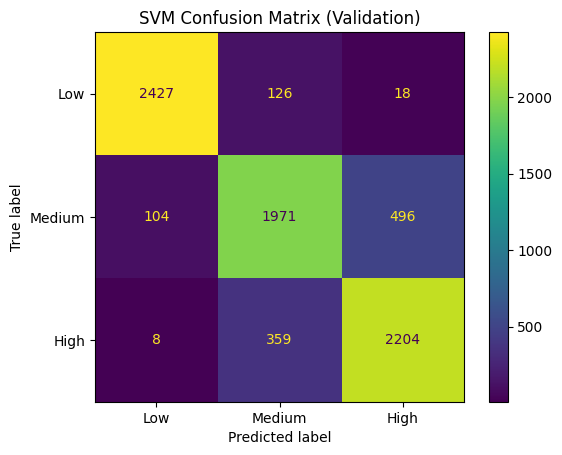

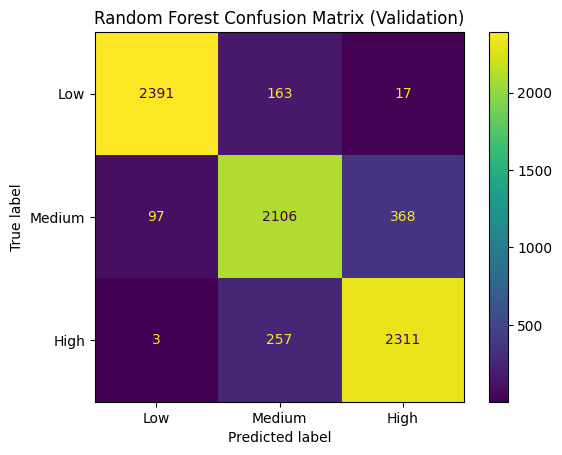

In [10]:
def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(values_format="d")
    plt.title(title)
    plt.show()

plot_cm(y_val, svm_val_pred, "SVM Confusion Matrix (Validation)")
plot_cm(y_val, rf_val_pred, "Random Forest Confusion Matrix (Validation)")


9. MLP implementation in depth (PyTorch) — selected technique for Part C
9.1 Prepare data for PyTorch (fit preprocessing on train, transform all splits)

In [11]:
# Fit the preprocessing pipeline on training data only (prevents data leakage)
preprocessor.fit(X_train)

X_train_t = preprocessor.transform(X_train)
X_val_t = preprocessor.transform(X_val)
X_test_t = preprocessor.transform(X_test)

# Convert sparse matrices (from one-hot) to dense arrays for PyTorch
def to_dense(matrix):
    return matrix.toarray() if hasattr(matrix, "toarray") else np.asarray(matrix)

X_train_np = to_dense(X_train_t).astype(np.float32)
X_val_np   = to_dense(X_val_t).astype(np.float32)
X_test_np  = to_dense(X_test_t).astype(np.float32)

# Encode labels: Low=0, Medium=1, High=2
label_to_id = {lab: i for i, lab in enumerate(labels)}
y_train_np = np.array([label_to_id[v] for v in y_train], dtype=np.int64)
y_val_np   = np.array([label_to_id[v] for v in y_val], dtype=np.int64)
y_test_np  = np.array([label_to_id[v] for v in y_test], dtype=np.int64)

input_dim = X_train_np.shape[1]
num_classes = 3
print("Input dimension:", input_dim)


Input dimension: 68


9.2 DataLoaders

In [12]:
BATCH_SIZE = 256

train_ds = TensorDataset(torch.from_numpy(X_train_np), torch.from_numpy(y_train_np))
val_ds   = TensorDataset(torch.from_numpy(X_val_np), torch.from_numpy(y_val_np))
test_ds  = TensorDataset(torch.from_numpy(X_test_np), torch.from_numpy(y_test_np))

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False)


9.3 Define the MLP model

In [13]:
class MLPClassifier(nn.Module):
    def __init__(self, input_dim: int, num_classes: int):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.20),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.20),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.net(x)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = MLPClassifier(input_dim=input_dim, num_classes=num_classes).to(device)
model


MLPClassifier(
  (net): Sequential(
    (0): Linear(in_features=68, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=64, out_features=3, bias=True)
  )
)

9.4 Training setup (loss, optimizer)

In [14]:
# CrossEntropyLoss is appropriate for multi-class classification with logits
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)


9.5 Training loop (with validation + early stopping)

In [15]:
def accuracy_from_logits(logits, y_true):
    preds = torch.argmax(logits, dim=1)
    return (preds == y_true).float().mean().item()

EPOCHS = 40
PATIENCE = 6  # early stopping patience

history = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}

best_val_loss = float("inf")
best_state = None
patience_counter = 0

for epoch in range(1, EPOCHS + 1):
    # ---- Train ----
    model.train()
    train_losses = []
    train_accs = []

    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)

        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())
        train_accs.append(accuracy_from_logits(logits, yb))

    # ---- Validate ----
    model.eval()
    val_losses = []
    val_accs = []
    with torch.inference_mode():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            logits = model(xb)
            loss = criterion(logits, yb)
            val_losses.append(loss.item())
            val_accs.append(accuracy_from_logits(logits, yb))

    train_loss = float(np.mean(train_losses))
    val_loss = float(np.mean(val_losses))
    train_acc = float(np.mean(train_accs))
    val_acc = float(np.mean(val_accs))

    history["train_loss"].append(train_loss)
    history["val_loss"].append(val_loss)
    history["train_acc"].append(train_acc)
    history["val_acc"].append(val_acc)

    print(f"Epoch {epoch:02d} | Train Loss: {train_loss:.4f} Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}")

    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= PATIENCE:
            print("Early stopping triggered.")
            break

# Restore best model
if best_state is not None:
    model.load_state_dict(best_state)


Epoch 01 | Train Loss: 0.8387 Acc: 0.6636 | Val Loss: 0.6265 Acc: 0.7640
Epoch 02 | Train Loss: 0.5428 Acc: 0.7812 | Val Loss: 0.4719 Acc: 0.8164
Epoch 03 | Train Loss: 0.4586 Acc: 0.8149 | Val Loss: 0.4246 Acc: 0.8302
Epoch 04 | Train Loss: 0.4219 Acc: 0.8287 | Val Loss: 0.4027 Acc: 0.8511
Epoch 05 | Train Loss: 0.4028 Acc: 0.8366 | Val Loss: 0.3907 Acc: 0.8560
Epoch 06 | Train Loss: 0.3904 Acc: 0.8433 | Val Loss: 0.3730 Acc: 0.8593
Epoch 07 | Train Loss: 0.3789 Acc: 0.8480 | Val Loss: 0.3610 Acc: 0.8635
Epoch 08 | Train Loss: 0.3685 Acc: 0.8511 | Val Loss: 0.3555 Acc: 0.8645
Epoch 09 | Train Loss: 0.3635 Acc: 0.8529 | Val Loss: 0.3415 Acc: 0.8687
Epoch 10 | Train Loss: 0.3535 Acc: 0.8557 | Val Loss: 0.3368 Acc: 0.8684
Epoch 11 | Train Loss: 0.3474 Acc: 0.8609 | Val Loss: 0.3307 Acc: 0.8712
Epoch 12 | Train Loss: 0.3446 Acc: 0.8616 | Val Loss: 0.3255 Acc: 0.8742
Epoch 13 | Train Loss: 0.3407 Acc: 0.8639 | Val Loss: 0.3237 Acc: 0.8700
Epoch 14 | Train Loss: 0.3344 Acc: 0.8653 | Val Los

9.6 Visualisation 1: Loss curve (train vs validation)

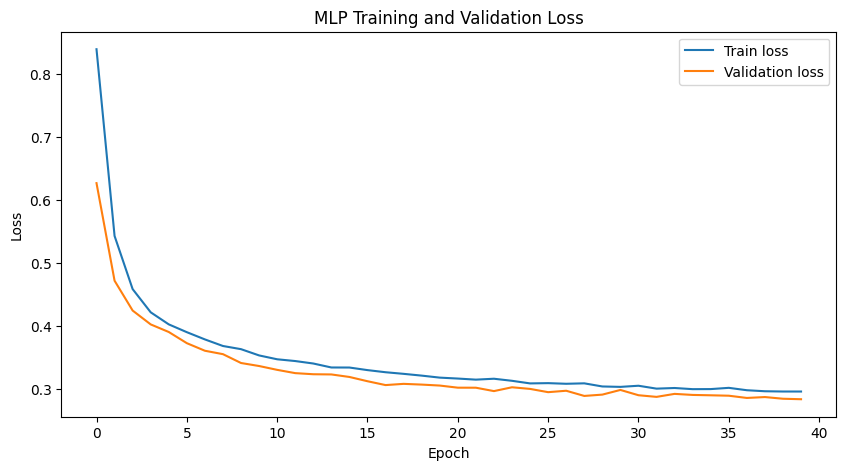

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(history["train_loss"], label="Train loss")
plt.plot(history["val_loss"], label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("MLP Training and Validation Loss")
plt.legend()
plt.show()


9.7 Evaluation on the test set (classification report + confusion matrix)

MLP Test Classification Report
              precision    recall  f1-score   support

         Low       0.86      0.90      0.88      3214
      Medium       0.95      0.95      0.95      3214
        High       0.85      0.81      0.83      3213

    accuracy                           0.89      9641
   macro avg       0.89      0.89      0.89      9641
weighted avg       0.89      0.89      0.89      9641



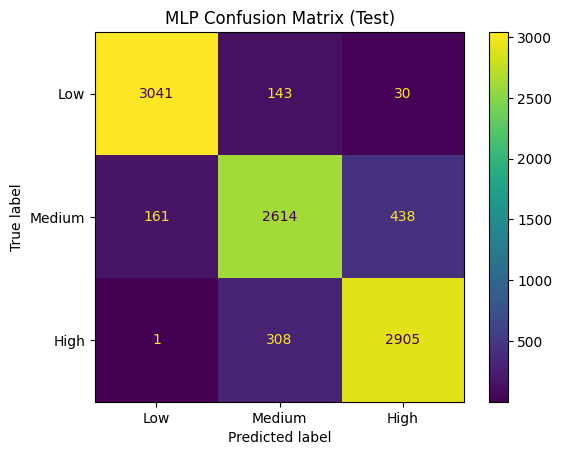

In [17]:
# Collect predictions on test set
model.eval()
all_logits = []
all_true = []

with torch.inference_mode():
    for xb, yb in test_loader:
        xb = xb.to(device)
        logits = model(xb).cpu()
        all_logits.append(logits)
        all_true.append(yb)

all_logits = torch.cat(all_logits, dim=0)
all_true = torch.cat(all_true, dim=0)

test_preds = torch.argmax(all_logits, dim=1).numpy()
test_true = all_true.numpy()

# Convert back to label names for reporting
id_to_label = {v: k for k, v in label_to_id.items()}
test_pred_labels = [id_to_label[i] for i in test_preds]
test_true_labels = [id_to_label[i] for i in test_true]

print("MLP Test Classification Report")
print(classification_report(test_true_labels, test_pred_labels, target_names=labels))

plot_cm(test_true_labels, test_pred_labels, "MLP Confusion Matrix (Test)")


10. “Most influential features” analysis (RF baseline)

Because MLPs are less directly interpretable, a practical approach is to use a strong baseline model (RF) to provide insight into which engineered/context features matter most. Here, permutation importance is computed on the validation set to estimate which input features contribute most to predictive performance.

In [18]:
from sklearn.inspection import permutation_importance

# Fit RF pipeline on combined train+val for a stable baseline explanation
X_trainval = pd.concat([X_train, X_val], axis=0)
y_trainval = pd.concat([y_train, y_val], axis=0)

rf_model.fit(X_trainval, y_trainval)

# Permutation importance on the *full pipeline* using raw X_val
result = permutation_importance(
    rf_model,           # <-- pipeline (preprocess + RF)
    X_val,              # <-- raw validation data (NOT transformed)
    y_val,              # <-- raw labels (NOT encoded)
    n_repeats=5,
    random_state=42,
    scoring="accuracy"
)

importances = result.importances_mean

# NOTE: Feature names come from the fitted preprocessor inside the pipeline
feature_names = rf_model.named_steps["preprocess"].get_feature_names_out()

top_idx = np.argsort(importances)[::-1][:15]

top_features = pd.DataFrame({
    "feature": feature_names[top_idx],
    "importance_mean": importances[top_idx]
}).reset_index(drop=True)

top_features

,feature,importance_mean
0,num__hour,0.572125
1,num__weekday,0.157371
2,num__temp,0.108829
3,num__month,0.082821
4,num__clouds_all,0.061403
5,cat__holiday_Independence Day,0.057047
6,num__is_weekend,0.050460
7,cat__holiday_Columbus Day,0.046960
8,num__rain_1h,0.005705
9,num__snow_1h,0.000130


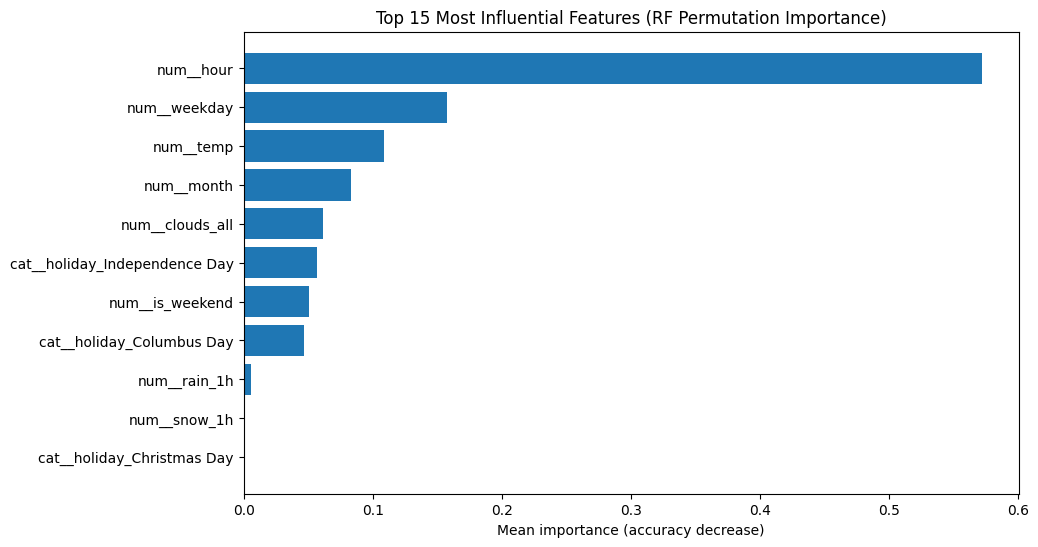

In [19]:
# Plot top 15 permutation importances
plt.figure(figsize=(10, 6))
plt.barh(top_features["feature"][::-1], top_features["importance_mean"][::-1])
plt.xlabel("Mean importance (accuracy decrease)")
plt.title("Top 15 Most Influential Features (RF Permutation Importance)")
plt.show()


11. Predict a new sample (end-to-end: raw input → preprocessing → MLP → probabilities)

In [20]:
def predict_congestion(sample: dict):
    """
    sample example:
    {
      "date_time": "2018-09-30 17:00:00",
      "holiday": "None",
      "temp": 295.1,
      "rain_1h": 0.0,
      "snow_1h": 0.0,
      "clouds_all": 90,
      "weather_main": "Clouds",
      "weather_description": "overcast clouds"
    }
    """
    s = sample.copy()
    s["date_time"] = pd.to_datetime(s["date_time"], errors="coerce")
    if pd.isna(s["date_time"]):
        raise ValueError("Invalid date_time in sample.")

    # Engineer time features
    s["hour"] = s["date_time"].hour
    s["weekday"] = s["date_time"].weekday()
    s["month"] = s["date_time"].month
    s["is_weekend"] = int(s["weekday"] >= 5)

    # Build a one-row dataframe in the same format as training
    row = pd.DataFrame([{
        "temp": s.get("temp", np.nan),
        "rain_1h": s.get("rain_1h", np.nan),
        "snow_1h": s.get("snow_1h", np.nan),
        "clouds_all": s.get("clouds_all", np.nan),
        "hour": s["hour"],
        "weekday": s["weekday"],
        "month": s["month"],
        "is_weekend": s["is_weekend"],
        "holiday": s.get("holiday", "None"),
        "weather_main": s.get("weather_main", "None"),
        "weather_description": s.get("weather_description", "None")
    }])

    # Preprocess using already-fitted preprocessor
    x = preprocessor.transform(row)
    x = to_dense(x).astype(np.float32)
    x_t = torch.from_numpy(x).to(device)

    # MLP inference
    model.eval()
    with torch.inference_mode():
        logits = model(x_t).cpu()
        probs = torch.softmax(logits, dim=1).numpy().flatten()

    pred_id = int(np.argmax(probs))
    pred_label = id_to_label[pred_id]
    return pred_label, probs

# Example prediction
example_sample = {
    "date_time": "2018-10-01 08:00:00",
    "holiday": "None",
    "temp": 285.5,
    "rain_1h": 0.0,
    "snow_1h": 0.0,
    "clouds_all": 75,
    "weather_main": "Clouds",
    "weather_description": "broken clouds"
}

pred_label, probs = predict_congestion(example_sample)
print("Predicted class:", pred_label)
print("Probabilities [Low, Medium, High]:", probs)


Predicted class: High
Probabilities [Low, Medium, High]: [0.01034492 0.13193214 0.857723  ]
